In [9]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
from pathlib import Path
import seaborn as sbn
sbn.set()
sbn.set_palette('bright')
base_path = Path(".").absolute().parent
repos_df = pd.read_csv(base_path/"repositories_flakiness_big.csv")

save: bool = True

In [11]:
modules = repos_df['MODULES']
modules_list = modules.tolist()
print("Number of projects: " + str(len(modules_list)))

Number of projects: 796


In [12]:
repos_df.describe()

,PATH,URL,HASH,MODULES,NAME,PYPI_VERSION,TAG_STATUS
count,796,796,796,796,796,796,796
unique,796,796,610,796,796,332,2
top,./src/projects/apache-airflow,https://github.com/apache/airflow,v0.9.0,{'airflow.contrib.operators.bigquery_check_ope...,apache-airflow,0.1.0,MATCH
freq,1,1,9,1,1,23,474


In [13]:
modules_df = repos_df['MODULES']
print(modules_df)

0      {'airflow.contrib.operators.bigquery_check_ope...
1      {'t.unit.backends.test_cosmosdbsql', 't.unit.w...
2      {'conans.client.cmd.user', 'conans.client.gene...
3      {'rest_framework.metadata', 'rest_framework.vi...
4      {'lib.bmp', 'lib.gui', 'lib.wallet', 'lib.gui_...
                             ...                        
791    {'yasa.features', 'yasa.others', 'yasa.io', 'y...
792    {'yeahyeah.cli', 'yeahyeah_plugins.clockify_pl...
793           {'zengin_code.bank', 'zengin_code.branch'}
794                                  {'randomizer.main'}
795       {'randomizer.partial', 'randomizer.randomize'}
Name: MODULES, Length: 796, dtype: object


In [14]:
number_of_modules_list = []
number_of_modules: int = 0
for index, row in modules_df.iteritems():
    row_list = row.split(",")
    number_of_modules_list.append(len(row_list))
    number_of_modules += len(row_list)
print("Number of modules: " + str(number_of_modules))

Number of modules: 15836


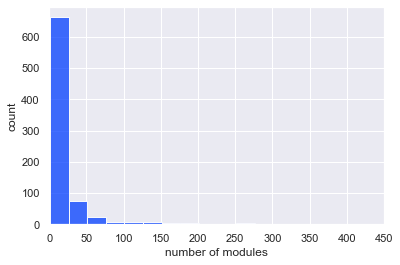

In [15]:
number_of_modules_df = pd.DataFrame(number_of_modules_list, columns=["SIZE"])
number_of_modules_df.describe()
#number_of_modules_df.boxplot(vert=False, figsize=(25,3))
#plt.figure(figsize=(15, 7))
#ax = sbn.boxplot(x=number_of_modules_df['SIZE'])
#ax.set(xlabel='Number of modules', xlim=(-10,450))

#ax = sbn.stripplot(y=number_of_modules_df['SIZE'])
#ax.set(ylabel='number of modules')
sbn.histplot(data=number_of_modules_df, x="SIZE", binwidth=25)
plt.xlabel("number of modules")
plt.ylabel("count")
plt.xlim((0, 450))

if save:
    plt.savefig("./figures/number_of_modules.png", dpi=1200)

In [16]:
number_of_modules_df.describe()

,SIZE
count,796.000000
mean,19.894472
std,46.834717
min,1.000000
25%,3.000000
50%,8.000000
75%,17.000000
max,806.000000
